In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def square(x):
#     Squares each element in input ndarray
    return np.power(x, 2)

def leaky_relu(x):
    return np.maximum(.2*x, x)

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
def derive(func, input_, delta=0.001):
    return (func(input_ + delta) - (func(input_ - delta)))/ (2 * delta)

In [5]:
def chain_derive_2(chain, input_range):
#   Uses the chain rule to compute the derivative of two nested functions:
#   (f2(f1(x))' = f2'(f1(x)) * f'(x)
    assert len(chain) == 2
    assert input_range.ndim == 1
    
    #functions mentioned above
    f1 = chain[0]
    f2 = chain[1]
    
    df1 = derive(f1, input_range)
    df2 = derive(f2, f1(input_range))
    
    return df2 * df1

def chain_length_2(chain, plot_range): #plot_range == ndarray
#     Evaluates two functions in a row, in a "chain"
    assert len(chain) == 2
    f1 = chain[0]
    f2 = chain[1]
    
    # example: return sigmoid(square(plot_range))
    '''
    square(plot_range) returns ndarray of same dimensions as 
    plot_range which is then fed into sigmoid()
    '''
    return f2(f1(plot_range))

def plot_chain2(chain, plot_range):
    plt.plot(plot_range, chain_length_2(chain, plot_range), label="f2(f1(x))")
    
    
def plot_chain_derive2(chain, plot_range):
    plt.plot(plot_range, chain_derive_2(chain, plot_range), label="f2(f1(x))'")

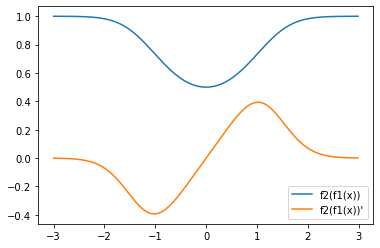

In [6]:
plot_range = np.arange(-3, 3, 0.01)

chain_1 = [square, sigmoid]

plot_chain2(chain_1, plot_range)
plot_chain_derive2(chain_1, plot_range)

plt.legend()

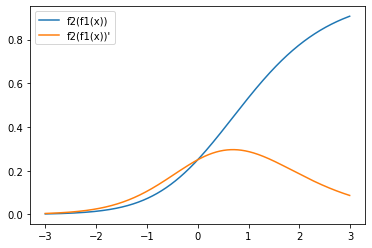

In [7]:
plot_range = np.arange(-3, 3, 0.01)

chain_2 = [sigmoid, square]

plot_chain2(chain_2, plot_range)
plot_chain_derive2(chain_2, plot_range)

plt.legend()

In [15]:
def chain_length_3(chain, x):
#     Evaluates three functions in a row, in a "chain"
    assert len(chain) == 3
    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]
    
    return f3(f2(f1(x)))


def plot_chain3(chain, plot_range):
    plt.plot(plot_range, chain_length_3(chain, plot_range), label="f3(f2(f1(x))")
    
    
def plot_chain_derive3(chain, plot_range):
    plt.plot(plot_range, chain_derive_3(chain, plot_range), label="f3(f2(f1(x))''")

    
def chain_derive_3(chain, input_range):
#   uses chain rule to compute the derivative of 3 composite functions
    assert len(chain) == 3
    
    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]
    
#     f1'(x)
    df1 = derive(f1, input_range)
#     f2'(x) * f1(x)
    df2 = derive(f2, f1(input_range))
#     f3'(x) * f2(x) * f1(x)
    df3 = derive(f3, f2(f1(input_range)))
#     returns array of values
    return df3 * df2 * df1

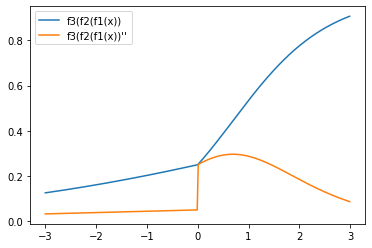

In [16]:
plot_range = np.arange(-3, 3, 0.01)

plot_chain3([leaky_relu, sigmoid, square], plot_range)
plot_chain_derive3([leaky_relu, sigmoid, square], plot_range)

plt.legend()

  -----------------------------------Functions with multiple inputs --------------------------------------------

In [17]:
 def multiple_inputs_add(x, y, sigma):
        assert x.shape == y.shape
        
        a = x + y
        return sigma(a)
    
def multiple_inputs_add_backward(x, y, sigma):
#     Computes the derivative of this function with resepect to both inputs

    a = x + y
    
    df_ds = derive(sigma, a)
    ds_dx, ds_dy = 1, 1
    
#      returns partial x, partial y
    return df_ds * ds_dx, df_ds * ds_dy

In [18]:
def matmul_forward(x, w):
#     computes the forward pass of a matrix multiplication
    assert x.shape[1] == w.shape[0]
    N = np.dot(x, w)
    
    return N

def matmul_backward_first(x, w):
#     backward pass
    dNdx = np.transpose(w, (1, 0))
    
# returns partial of the dot product N with respect to x
    return dNdx

In [40]:
np.random.seed(190203)

x = np.random.randn(1, 3)
w = np.random.randn(3, 1)

print(f"x:\n{x}")
print(f"w:\n{w}")

x:
[[ 0.47231121  0.61514271 -1.72622715]]
w:
[[ 0.92819676]
 [-0.60754888]
 [-1.22136052]]


In [41]:
print(f"matmul_forward:\n{matmul_forward(x, w)}")
print("\n")
print(f"matmul_backward_first:\n{matmul_backward_first(x, w)}")

matmul_forward:
[[2.17301417]]


matmul_backward_first:
[[ 0.92819676 -0.60754888 -1.22136052]]


In [57]:
def matrix_forward_extra(x, w, sigma):
    assert x.shape[1] == w.shape[0]
    N = np.dot(x, w)
    
#     returns S = sigma(np.dot(x, w))
    return sigma(N)

def matrix_function_backward_1(x, w, sigma):
    # f = sigmoid(np.dot(x, w))

    assert x.shape[1] == w.shape[0]    
    N = np.dot(x, w)
    
    # Derivative of sigmoid
    ds_dN = derive(sigma, N)
    
    # Partial derivative of the dot product with respect to x
    dN_dx = np.transpose(w, (1, 0))
    
    # Returns derivative of f
    return np.dot(ds_dN, dN_dx)

In [56]:
print(f"S:\n{matrix_forward_extra(x, w, sigmoid)}")
print(f"x:\n{x}")
print(f"w:\n{w}")
print(f"Derivative:\n{matrix_function_backward_1(x, w, sigmoid)}")

S:
[[0.89779986]]
x:
[[ 0.47231121  0.61514271 -1.72622715]]
w:
[[ 0.92819676]
 [-0.60754888]
 [-1.22136052]]
ds_dN:
[[0.09175527]]
Derivative:
[[ 0.08516695 -0.05574581 -0.11206627]]


-----------------------------------------------Matrix Multiplication----------------------------------------------

In [58]:
import logging

In [35]:
# logging.basicConfig(level=logging.DEBUG, format=' %(asctime)s -  %(levelname)s-  %(message)s')

def matrix_function_forward_sum_1(x, w, sigma):
    
    assert x.shape[1] == w.shape[0]
    
    # Matrix multiplication
    N = np.dot(x, w)
    
    logging.debug(f'Shape of N: {N.shape}')
    
    S = sigma(N)
    
    # Sums all the elements
    L = np.sum(S)
    
    return L

def matrix_function_backward_sum(x, w, sigma):
    
    assert x.shape[1] == w.shape[0]
    
    # Compute values
    N = np.dot(x, w)
    S = sigma(N)
    L = np.sum(S)
    
    # partial N with respect to x
    
    dN_dx = np.transpose(w, (1, 0))
    
    # Compute derivatives
    ds_dN = derive(sigma, N)
    
    # L is sum of all terms S, so the derivative of each term is 1
    dL_ds = np.ones_like(S)
    
    # Multiply derivative matricies elementwise to get dL_dN
    dL_dN = dL_ds * ds_dN
    
    # Everything packed into each other
    dL_dx = np.dot(dL_dN, dN_dx)
    
    return dL_dx

In [36]:
np.random.seed(190204)
x = np.random.randn(3, 3)
w = np.random.randn(3, 2)

print(f"x:\n{x}")
print(f"w:\n{w}")
print()
print(f"L:\n{round(matrix_function_forward_sum_1(x, w, sigmoid), 4)}")
print()
print(f"dL_dx\n{matrix_function_backward_sum(x, w, sigmoid)}")

x:
[[-1.57752816 -0.6664228   0.63910406]
 [-0.56152218  0.73729959 -1.42307821]
 [-1.44348429 -0.39128029  0.1539322 ]]
w:
[[ 0.75510818  0.25562492]
 [-0.56109271 -0.97504841]
 [ 0.98098478 -0.95870776]]

L:
2.3755

dL_dx
[[ 0.2488887  -0.37478057  0.01121962]
 [ 0.12604152 -0.27807404 -0.13945837]
 [ 0.22992798 -0.36623443 -0.02252592]]


In [126]:
x1 = x.copy()
x1[0, 0] += 0.001
print("Should return", .2488*.001)
a = matrix_function_forward_sum_1(x, w, sigmoid)
b = matrix_function_forward_sum_1(x1, w, sigmoid)
print(f"A:\n{a}")
print(f"B:\n{a}")
print(f"A-B:\n{b-a}")
print()

Should return 0.0002488
A:
2.375495101411695
B:
2.375495101411695
A-B:
0.00024889684117646027



In [127]:
def matrix_function_modify_x11(x, w, sigma, x11):
    
    assert x.shape[1] == w.shape[0]
    
    x[0][0] = x11
    
    N = np.dot(x, w)
    S = sigma(N)
    L = np.sum(S)
    
    return L

In [128]:
x11s = np.arange(x[0][0] - 1, x[0][0] + 1, .01)
Ls = [matrix_function_modify_x11(x, w, sigmoid, x11=x11) for x11 in x11s]

Text(0, 0.5, 'L Values')

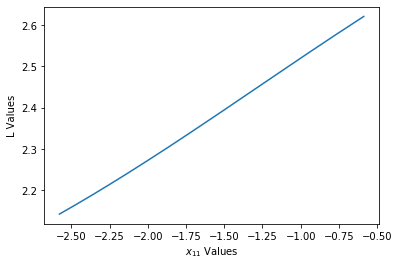

In [132]:
plt.plot(x11s, Ls)
plt.xlabel("$x_{11}$ Values")
plt.ylabel("L Values")